### Student Details

Student name: Divya Acharya

Student ID: 23283742

In [16]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Importing necessary library for accessing files in Google Drive
from google.colab import drive
# Defining the file path for the CSV file
file_path = "iris_data.csv"

In [18]:
import pandas as pd
# Reading the CSV file into a pandas DataFrame
iris_df = pd.read_csv(file_path, header=0)
# Displaying the first few rows of the DataFrame
iris_df.head

<bound method NDFrame.head of      sepal_length  sepa_width  petal_length  petal_width           class
0             5.1         3.5           1.4          0.2     Iris-setosa
1             4.9         3.0           1.4          0.2     Iris-setosa
2             4.7         3.2           1.3          0.2     Iris-setosa
3             4.6         3.1           1.5          0.2     Iris-setosa
4             5.0         3.6           1.4          0.2     Iris-setosa
..            ...         ...           ...          ...             ...
145           6.7         3.0           5.2          2.3  Iris-virginica
146           6.3         2.5           5.0          1.9  Iris-virginica
147           6.5         3.0           5.2          2.0  Iris-virginica
148           6.2         3.4           5.4          2.3  Iris-virginica
149           5.9         3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [19]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        # Initialize Adaline with learning rate and number of epochs
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
         # Initialize weights to zeros and create an empty list to store costs
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
             # Calculate net input and calculate errors
            output = self.net_input(X)
            errors = (y - output)
            
            # Update weights, including the bias unit
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # Calculate cost and append it to the cost list
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        # Compute the dot product between the input and the weights
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        # Compute the linear activation using the net input
        return self.net_input(X)

    def predict(self, X):
        # Return class label after unit step
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [20]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        # Initialize logistic regression with learning rate and number of epochs
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
         # Initialize weights to zeros and create an empty list to store costs
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            # Update weights, including the bias unit
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # Cost function for logistic regression
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)


        return self

    def net_input(self, X):
         # Compute the dot product between the input and the weights
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # Clip the z value for stability and prevent overflow errors
        z = np.clip(z, -250, 250)
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        # Return class label based on the predicted probability
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

# Read the Iris-setosa and Iris-versicolor, sepal length and petal length
filtered_df = iris_df[(iris_df['class'] == 'Iris-versicolor') | (iris_df['class'] == 'Iris-setosa')]

# Getting features and labels
X = filtered_df[['sepal_length', 'petal_length']].values
y = np.where(filtered_df['class'] == 'Iris-setosa', 0, 1)  # Convert to 0 for setosa and 1 for versicolor

# Train the algorithm
model = LogisticRegressionGD(eta=0.01, epochs=500)
model.train(X, y)


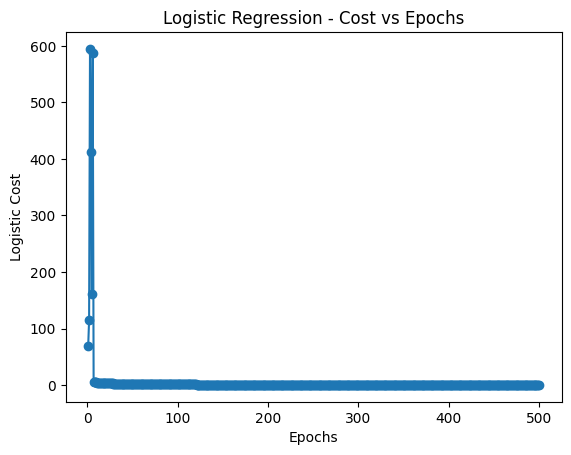

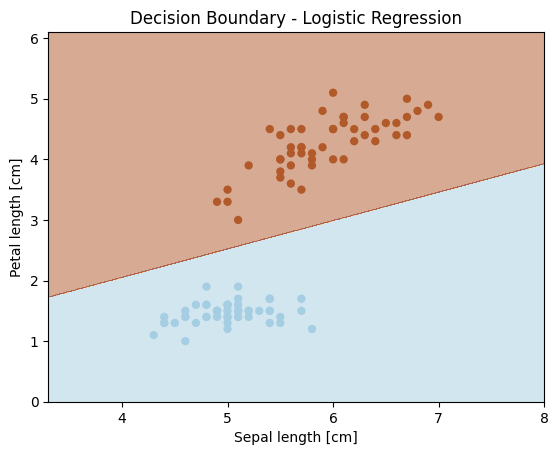

In [21]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax


# Plotting the Logistic cost per epoch of training
plt.plot(range(1, len(model.cost_) + 1), model.cost_, marker='o') # Plotting the cost over epochs
plt.xlabel('Epochs') # Setting label for the x-axis
plt.ylabel('Logistic Cost')  # Setting label for the y-axis
plt.title('Logistic Regression - Cost vs Epochs') # Setting the title for the plot
plt.show() # Display the plot

# Plot the decision boundary using the supplied plot_decision_boundary function
plot_decision_boundary(X, y, model) # Call the function to plot the decision boundary
plt.title('Decision Boundary - Logistic Regression') # Set the title for the plot
plt.xlabel('Sepal length [cm]') # Set the label for the x-axis
plt.ylabel('Petal length [cm]') # Set the label for the y-axis
plt.show() # Display the plot

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

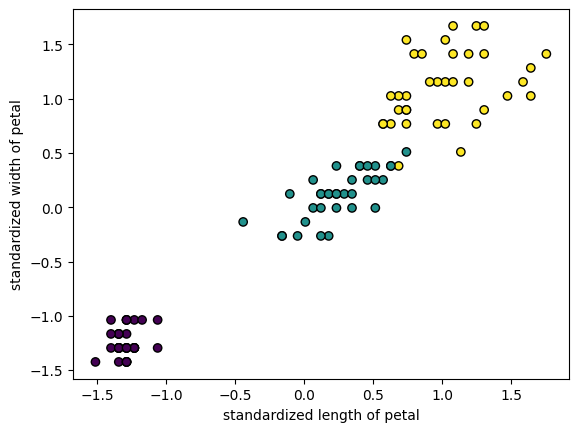

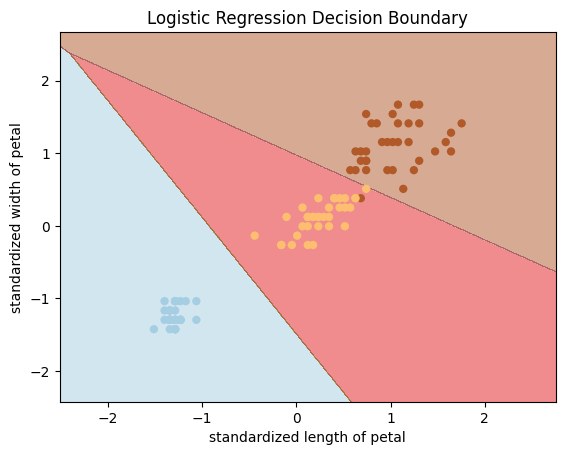

Accuracy: 0.9111


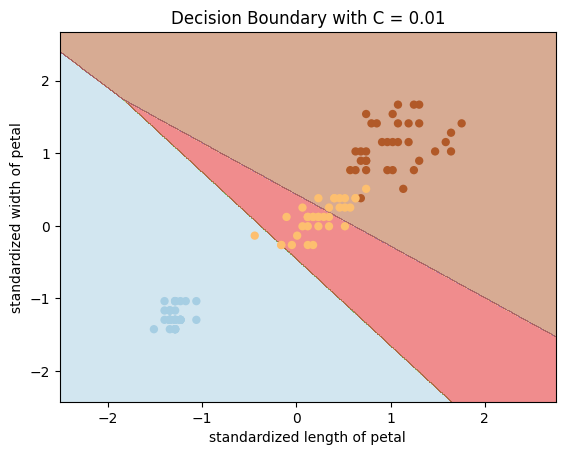

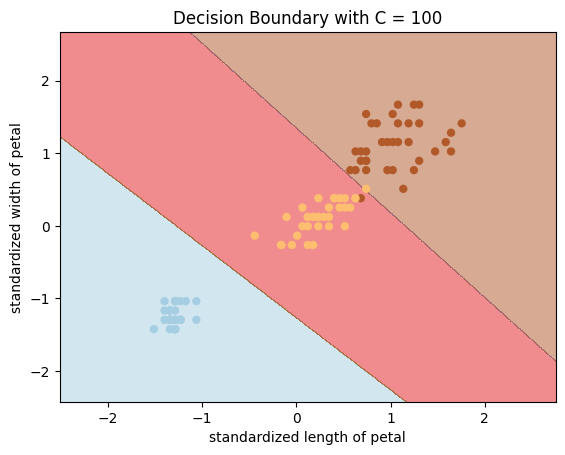

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = iris_df[['petal_length', 'petal_width']].values
y = iris_df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

# 2. Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Scaling the data and plotting
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Plotting the standardized features with different colors for each class
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.show()

# 4. Train Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_std, y_train)

# 5. Plot decision boundary
# from plot_decision_boundary import plot_decision_boundary
plot_decision_boundary(X_train_std, y_train, lr)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.show()

# 6. Calculating and printing the accuracy of the model on the test set
y_pred = lr.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Training the Logistic Regression model with different regularization values and plotting the decision boundaries
for value in [0.01, 100]:
    # Train Logistic Regression with specified regularization value
    lr = LogisticRegression(C=value, random_state=42)
    lr.fit(X_train_std, y_train)
    
    # Plot the decision boundary for the current regularization value
    plot_decision_boundary(X_train_std, y_train, lr)
    plt.title(f'Decision Boundary with C = {value}')
    plt.xlabel('standardized length of petal')
    plt.ylabel('standardized width of petal')
    plt.show()

<span style="color:red">Insert your text answers below</span>.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

Scaled training data:
 [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312 ]
 [ 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


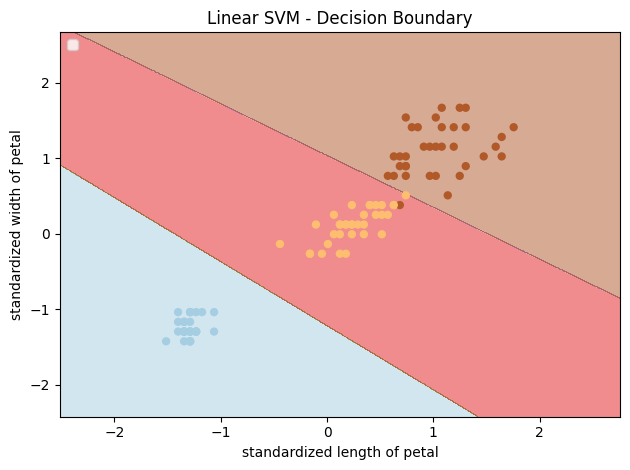

Accuracy: 0.9111111111111111


In [23]:
################################
# Your code here

from sklearn.svm import SVC

X = iris_df[['petal_length', 'petal_width']].values
y = iris_df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

# 2. Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Scaling the data and printing
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("Scaled training data:\n", X_train_std)
print("Scaled test data:\n", X_test_std)

# 4. Train a linear SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_std, y_train)

# 5. Plot decision boundary
# from plot_decision_boundary import plot_decision_boundary
plot_decision_boundary(X_train_std, y_train, svm)
plt.title('Linear SVM - Decision Boundary')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 6. Calculate accuracy
y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

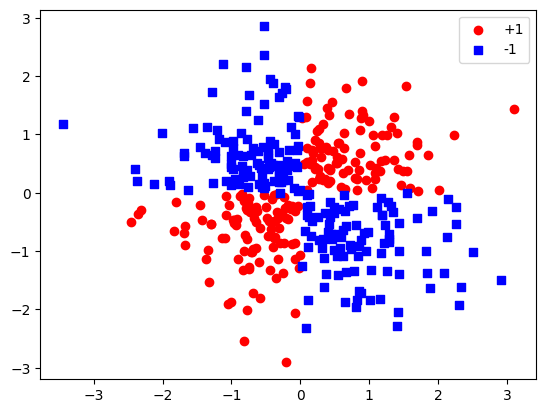

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for demonstration
X_r = np.random.randn(400,2) # Generating 400 data points with 2 features
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1) # Assigning labels based on the condition x[0]*x[1]>0

# Plotting the data points with different markers and colors based on their labels
plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1') # Scatter plot for class 1 (+1) data points
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1') # Scatter plot for class -1 data points
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


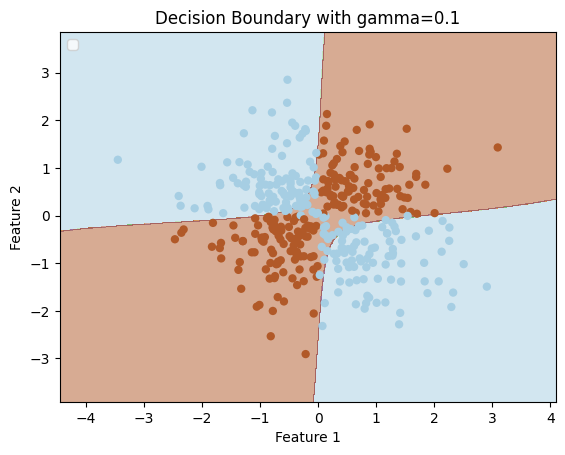

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


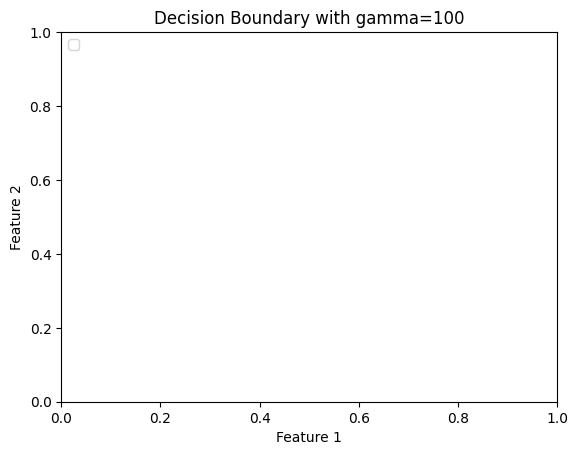

The decision boundary gets overfitted (too sensitive to individual data points) with a high gamma value.

This makes the prediction less generalizable to fresh data and causes it to capture noise.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


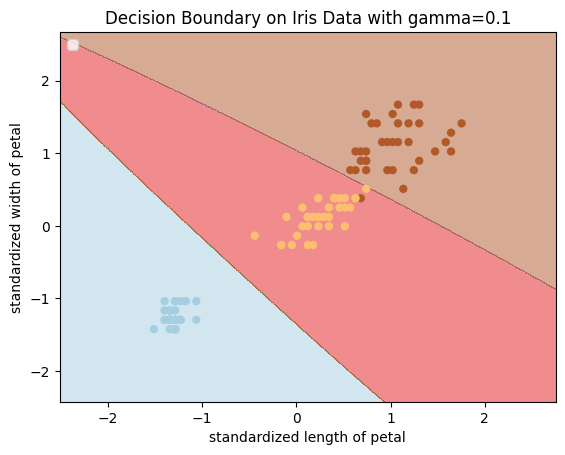

In [25]:
# from sklearn.svm import SVC
# from plot_decision_boundary import plot_decision_boundary

# 1. Run an RBF kernel SVM model on the randomized data
svm_rbf = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_rbf.fit(X_r, y_r)

# 2. Plot the decision boundaries for gamma = 0.1
plot_decision_boundary(X_r, y_r, svm_rbf)
plt.title('Decision Boundary with gamma=0.1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

# 3. Changing the gamma value to 100 and retrain
svm_rbf_high_gamma = SVC(kernel='rbf', gamma=100, random_state=42)
svm_rbf_high_gamma.fit(X_r, y_r)

# plot_decision_boundary(X_r, y_r, svm_rbf_high_gamma)
plt.title('Decision Boundary with gamma=100')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

# Description
print("The decision boundary gets overfitted (too sensitive to individual data points) with a high gamma value.")
print("\nThis makes the prediction less generalizable to fresh data and causes it to capture noise.")

# Multi-class Iris data with RBF SVM
svm_rbf_iris = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_rbf_iris.fit(X_train_std, y_train)  # using the standardized Iris data from previous steps

plot_decision_boundary(X_train_std, y_train, svm_rbf_iris)
plt.title('Decision Boundary on Iris Data with gamma=0.1')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.legend(loc='upper left') 
plt.show() # Display the plot
